Taller tomado e inspirado en EC1 del curso DS4A

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha visto aumentar el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019). 

La ciudad te ha contratado para construir visualizaciones que les ayuden a identificar patrones en los accidentes, lo que les ayudaría a tomar acciones preventivas para reducir el número de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. Que les importa y de los que les gustaría obtener información específica.

**Tu tarea es formatear los datos dados y proporcionar visualizaciones que respondan a las preguntas específicas del cliente, que se mencionan a continuación.

**Contexto analítico: Se le da un archivo CSV (almacenado en la carpeta "datos" ya creada) que contiene detalles sobre cada accidente, como la fecha, la hora, la ubicación del accidente, el motivo del accidente, los tipos de vehículos implicados, el número de heridos y muertos, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Usted realizará las siguientes tareas con los datos:

1. Extraer los datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar los datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Usted tendrá que proporcionar visualizaciones para acompañarlas.

Tenemos las siguientes columnas:

1. **BOROUGH**: The borough in which the accident occurred
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the location of the accident
5. **DATE**: Date of the accident
6. **TIME**: Time of the accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Injuries by category
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Deaths by category
11. **ON STREET NAME**: Street where the accident occurred
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: Zip code of the accident location

## Ejercicios

In [1]:
# Importe aqui las librerias necesarias (numpy,pandas,seaborn,etc)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

1. Utilice (adapte) la función json.load() para cargar el archivo borough_data.json como un diccionario.

In [2]:
#Pista
with open('borough_data.json') as f:
    borough_data=json.load(f)
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

2. Del mismo modo, utilice la función de pandas read_csv() para cargar el archivo accidents.csv como un DataFrame. Nombre este DataFrame df. Nota: Recuerde que ek separador es ';' en lugar de ','

In [3]:
df = pd.read_csv('accidents.csv', sep = ';')
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


### Respondiendo las preguntas del cliente

1. Agrupe los datos de accidentes por mes.

In [4]:
#Pista. que hacen estas funciones? 
df["DATE2"]=pd.to_datetime(df["DATE"]).dt.to_period("M")
df_mes=df.groupby("DATE2").size()
df_mes


DATE2
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, dtype: int64

2. Genere un diagrama de linea cuyo eje 'x' sea la fecha y el 'y' numero de accidentes. 

<AxesSubplot:xlabel='DATE2'>

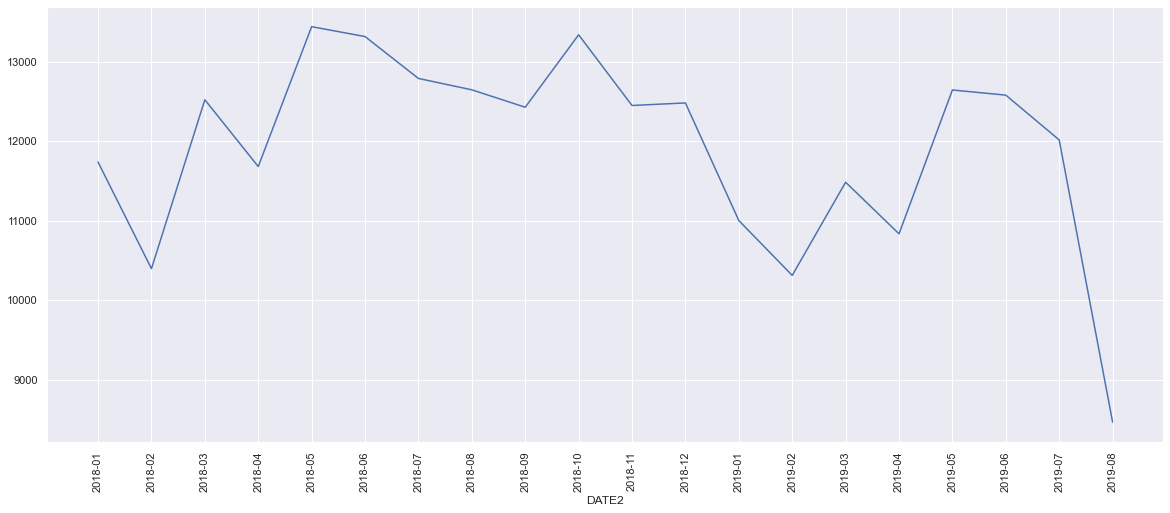

In [5]:
df_mes.index = df_mes.index.astype(str)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,8))
plt.xticks(rotation=90)
sns.lineplot(x = df_mes.index, y = df_mes.values)

3. Responda: Segun el diagrama anterior, incrementaron los accidentes durante el ultimo año y medio?

R/ En el intervalo entre la fecha 2018-03 y 2019-08 existen picos en los que se presentan una mayor cantidad de accidentes como fue en el año 2018-10 con una cifra que ascendió a los 13336 accidentes. Sin embargo, a la ultima fecha los accidentes se han reducido en una cantidad considerable ubicandose en 8466 accidentes para este año.

4. Según el gráfico anterior, ¿qué meses parecen tener el menor número de accidentes? ¿A qué crees que se debe esto?

R/ Se observa que los meses con menor indice de accidentes son enero, febrero y abril quizas debido a que es una epoca de invierno y la nieve produce una disminución en el tráfico de la ciudad

5. Cree una nueva columna HORA basada en los datos de la columna TIME.
Sugerencia: Puede encontrar útil la funcion dt.hour.

In [6]:
time = df['TIME'].astype('datetime64[ns]')
df['HORA'] = time.dt.hour
df['HORA']

0         12
1         16
2         19
3         13
4         22
          ..
238517    15
238518    14
238519    13
238520    17
238521    16
Name: HORA, Length: 238522, dtype: int64

6. Genere un grafico de barras cuyo eje 'x' sea la hora y eje 'y' el numero de accidentes 

In [7]:
df_hora = df.groupby('HORA').size()
df_hora

HORA
0      8160
1      3460
2      2570
3      2302
4      2562
5      2878
6      4844
7      7399
8     13403
9     12939
10    11981
11    12815
12    13731
13    14224
14    16889
15    15886
16    17536
17    17209
18    14899
19    11885
20     9597
21     8330
22     7216
23     5807
dtype: int64

<AxesSubplot:xlabel='HORA'>

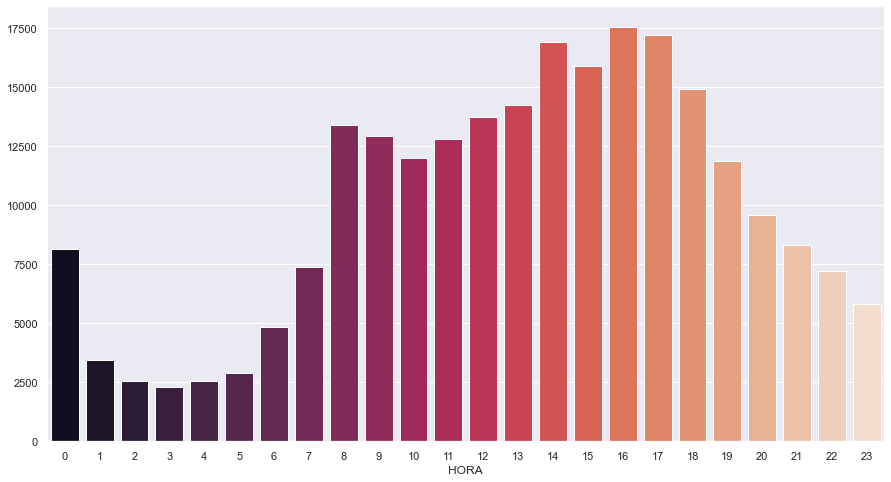

In [8]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,8))
sns.barplot(x = df_hora.index, y = df_hora.values, palette = 'rocket')

7. ¿Cómo varía el número de accidentes a lo largo de un mismo día?

R/ Se observa que en horas de la madrugada se presenta el menor indice de accidentes y a eso de las 8 de la mañana estos empiecen a presentar un incremento llegando a su pico mas alto a las 16 y 17 horas. A partir de alli, el numero de accidentes empiezan a caer considerablemente.

8. En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar de ocurrencia. ¿Qué crítica le haría a este enfoque?

R/ 

9. Calcule el número de accidentes por día de la semana.
Sugerencia: Puede encontrar útil dt.weekday.

In [9]:
df["DATE3"] = pd.to_datetime(df["DATE"]).dt.weekday
df_day = df.groupby("DATE3").size()
df_day.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='DATE3')

In [10]:
dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
df_day.index = dias

10. Cree un gráfico de barras basado en el recuento de accidentes por día de la semana.

<AxesSubplot:>

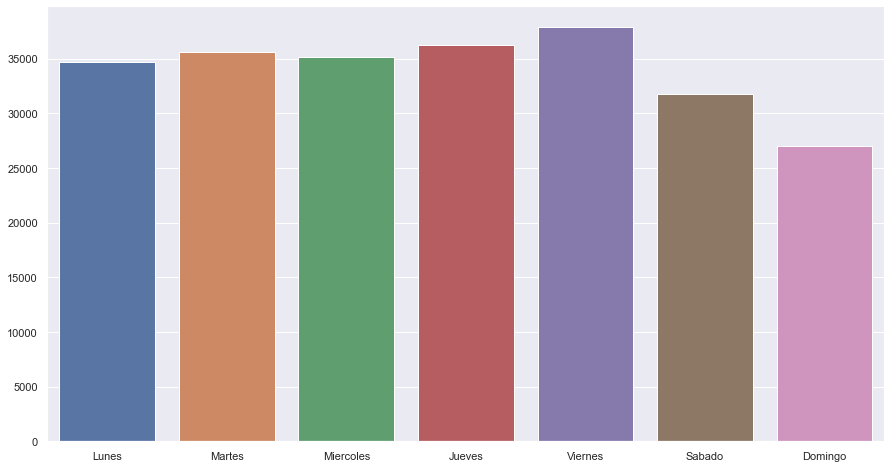

In [11]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,8))
sns.barplot(x = df_day.index, y = df_day.values)

11. ¿Cómo varía el número de accidentes a lo largo de una misma semana?

12. Calcule el número total de accidentes de cada borough

In [13]:
df_borough = df.groupby('BOROUGH').size()
df_borough

BOROUGH
BRONX            37709
BROOKLYN         76253
MANHATTAN        48749
QUEENS           67120
STATEN ISLAND     8691
dtype: int64

13. Cree un gráfico con lo anterior

<AxesSubplot:ylabel='BOROUGH'>

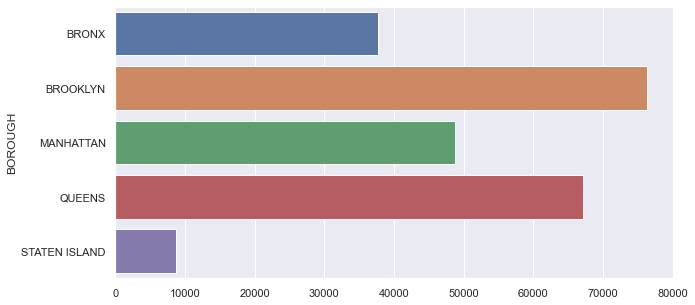

In [14]:
plt.figure(figsize = (10, 5))
sns.barplot(y = df_borough.index, x = df_borough.values)

14. Qué notas en este gráfico?

R/

15. (dificil) ¿Y por milla cuadrada? Calcule el número de accidentes por milla cuadrada para cada municipio.
Pista: Tendrás que actualizar las claves del diccionario de municipios para que coincidan con los nombres del DataFrame.

16. Traza un gráfico de barras de los accidentes por milla cuadrada por municipio con los datos que acabas de calcular.

17. Que puedes concluir de este grafico?

R/

18. Trace un gráfico de barras para cada borough que muestre el número de accidentes para cada hora del día. Sugerencia: Puede utilizar sns.FacetGrid para crear una cuadrícula de gráficos con los datos horarios de cada borough.

In [15]:
df["DATE2"]=pd.to_datetime(df["DATE"]).dt.to_period("M")
df_mes=df.groupby("DATE2").size()
df_mes

DATE2
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, dtype: int64

19. ¿Cuáles son las horas en las que se producen más accidentes en cada borough?

R/